### EDA for the target variable

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

# for data preprocessing
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

# to remove the unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to ensure clear background of the visualization and enhance visibility
sns.set_context('talk')

from ipynb.fs.full.F02_data_viz_functions import distribution, correlation_plot

### Load the train dataset

In [2]:
train = pd.read_csv("train.csv")
train = train.set_index('id')

display(train.head())
print(train.shape)

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,,,,,,,,,,,,,,,,,,,,,
1,A,B,A,B,A,A,A,A,B,A,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
2,A,B,A,A,A,A,A,A,B,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
5,A,B,A,A,B,A,A,A,B,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
10,B,B,A,B,A,A,A,A,B,A,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
11,A,B,A,B,A,A,A,A,B,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


(188318, 131)


In [3]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


The given dataset has 188318 rows and 130 features
<br>Target variable = 'loss'

### Target variable transformation

In [4]:
transformer_1 = QuantileTransformer(output_distribution = 'normal')
transformer_2 = PowerTransformer()
transformer_3 = PowerTransformer(method='box-cox')

### Exploratory Data Analysis

In [5]:
# separating the target variable
target = train[['loss']]

# target variable transformation
target['loss_QuantileTransformer_normal'] = np.squeeze(transformer_1.fit_transform(target[['loss']]))
target['loss_PowerTransformer_yeo_johnson'] = np.squeeze(transformer_2.fit_transform(target[['loss']]))
target['loss_PowerTransformer_boxcox'] = np.squeeze(transformer_3.fit_transform(target[['loss']]))

print(target.shape)

(188318, 4)


### Target variable distribution for different transformation

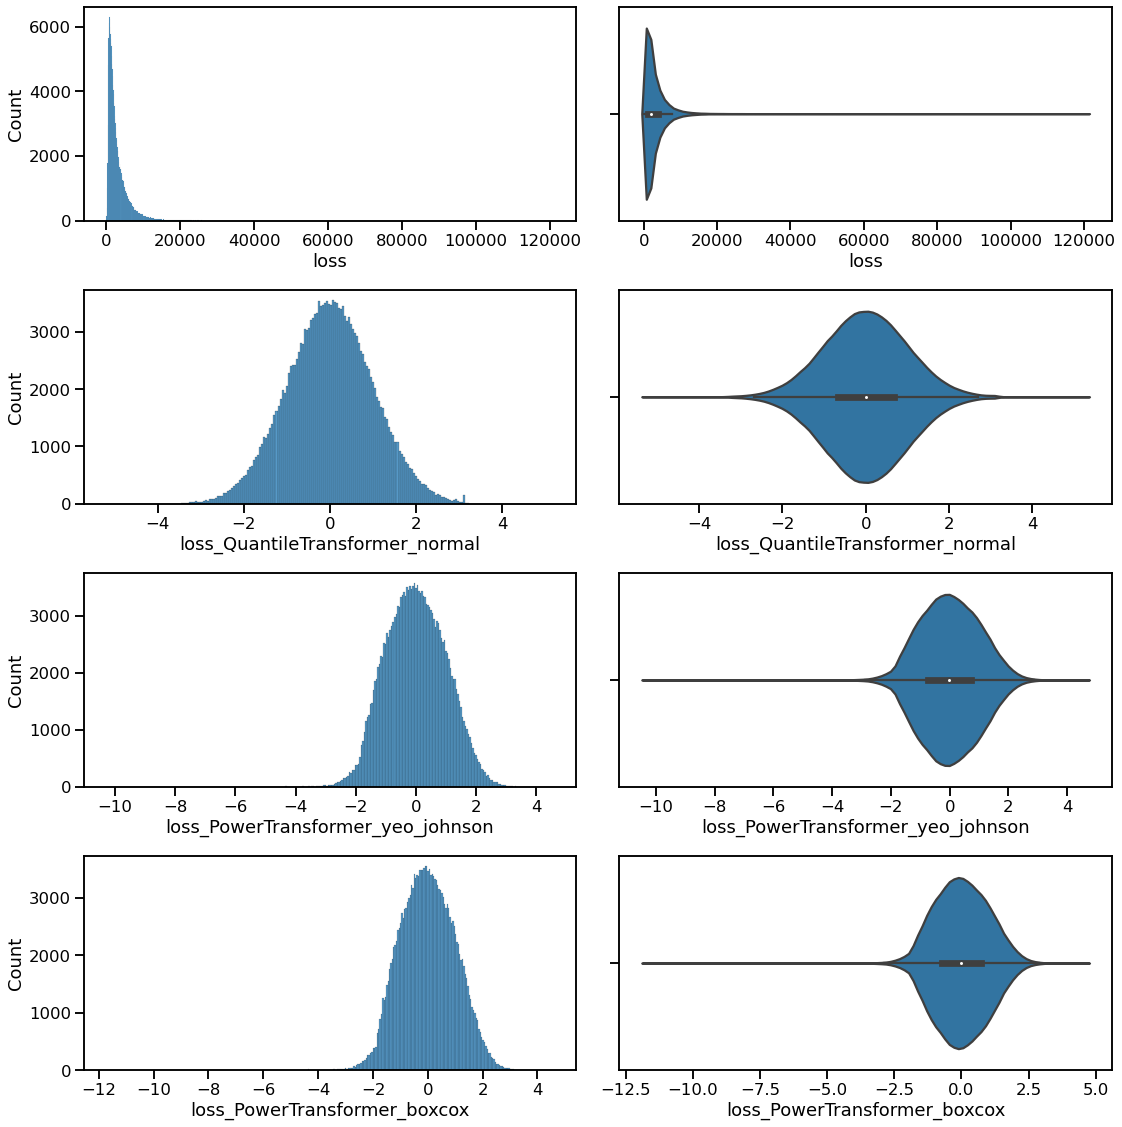

In [6]:
distribution(target)

As our target variable 'loss' is not normally distributed, I did different transformations. Although, linear models get improved if the residuals are normally distributed, sometimes tree-based models performance can also be improved.

QuantileTransformer and PowerTransformer transformed the target variable distribution as 'normal'. These transformers are reversible but found that if we do the inverse transform of the QuantileTransformer, it doesn't return the exact values. As, our target variable is always greater than zero and positive, I have selected the box-cox method of the PowerTransformer. PowerTransformer method is reversible.

### Stats of target variable distribution

In [7]:
target.describe()

,loss,loss_QuantileTransformer_normal,loss_PowerTransformer_yeo_johnson,loss_PowerTransformer_boxcox
count,188318.000000,188318.000000,1.883180e+05,1.883180e+05
mean,3037.337686,0.001581,1.766662e-15,6.845654e-16
std,2904.086186,0.999751,1.000003e+00,1.000003e+00
min,0.670000,-5.199338,-1.029987e+01,-1.173232e+01
25%,1204.460000,-0.670970,-7.215512e-01,-7.216198e-01
50%,2115.570000,0.001913,-1.805959e-02,-1.868341e-02
75%,3864.045000,0.674208,7.163869e-01,7.158855e-01
max,121012.250000,5.199338,4.579726e+00,4.595191e+00


### Adding the normally distributed transformed target variables to the train dataset for comparison

In [8]:
train['loss_PowerTransformer_boxcox'] = target['loss_PowerTransformer_boxcox'].values

print(train.shape)

(188318, 132)


### Correlation coefficient of the continuous features with the target variable

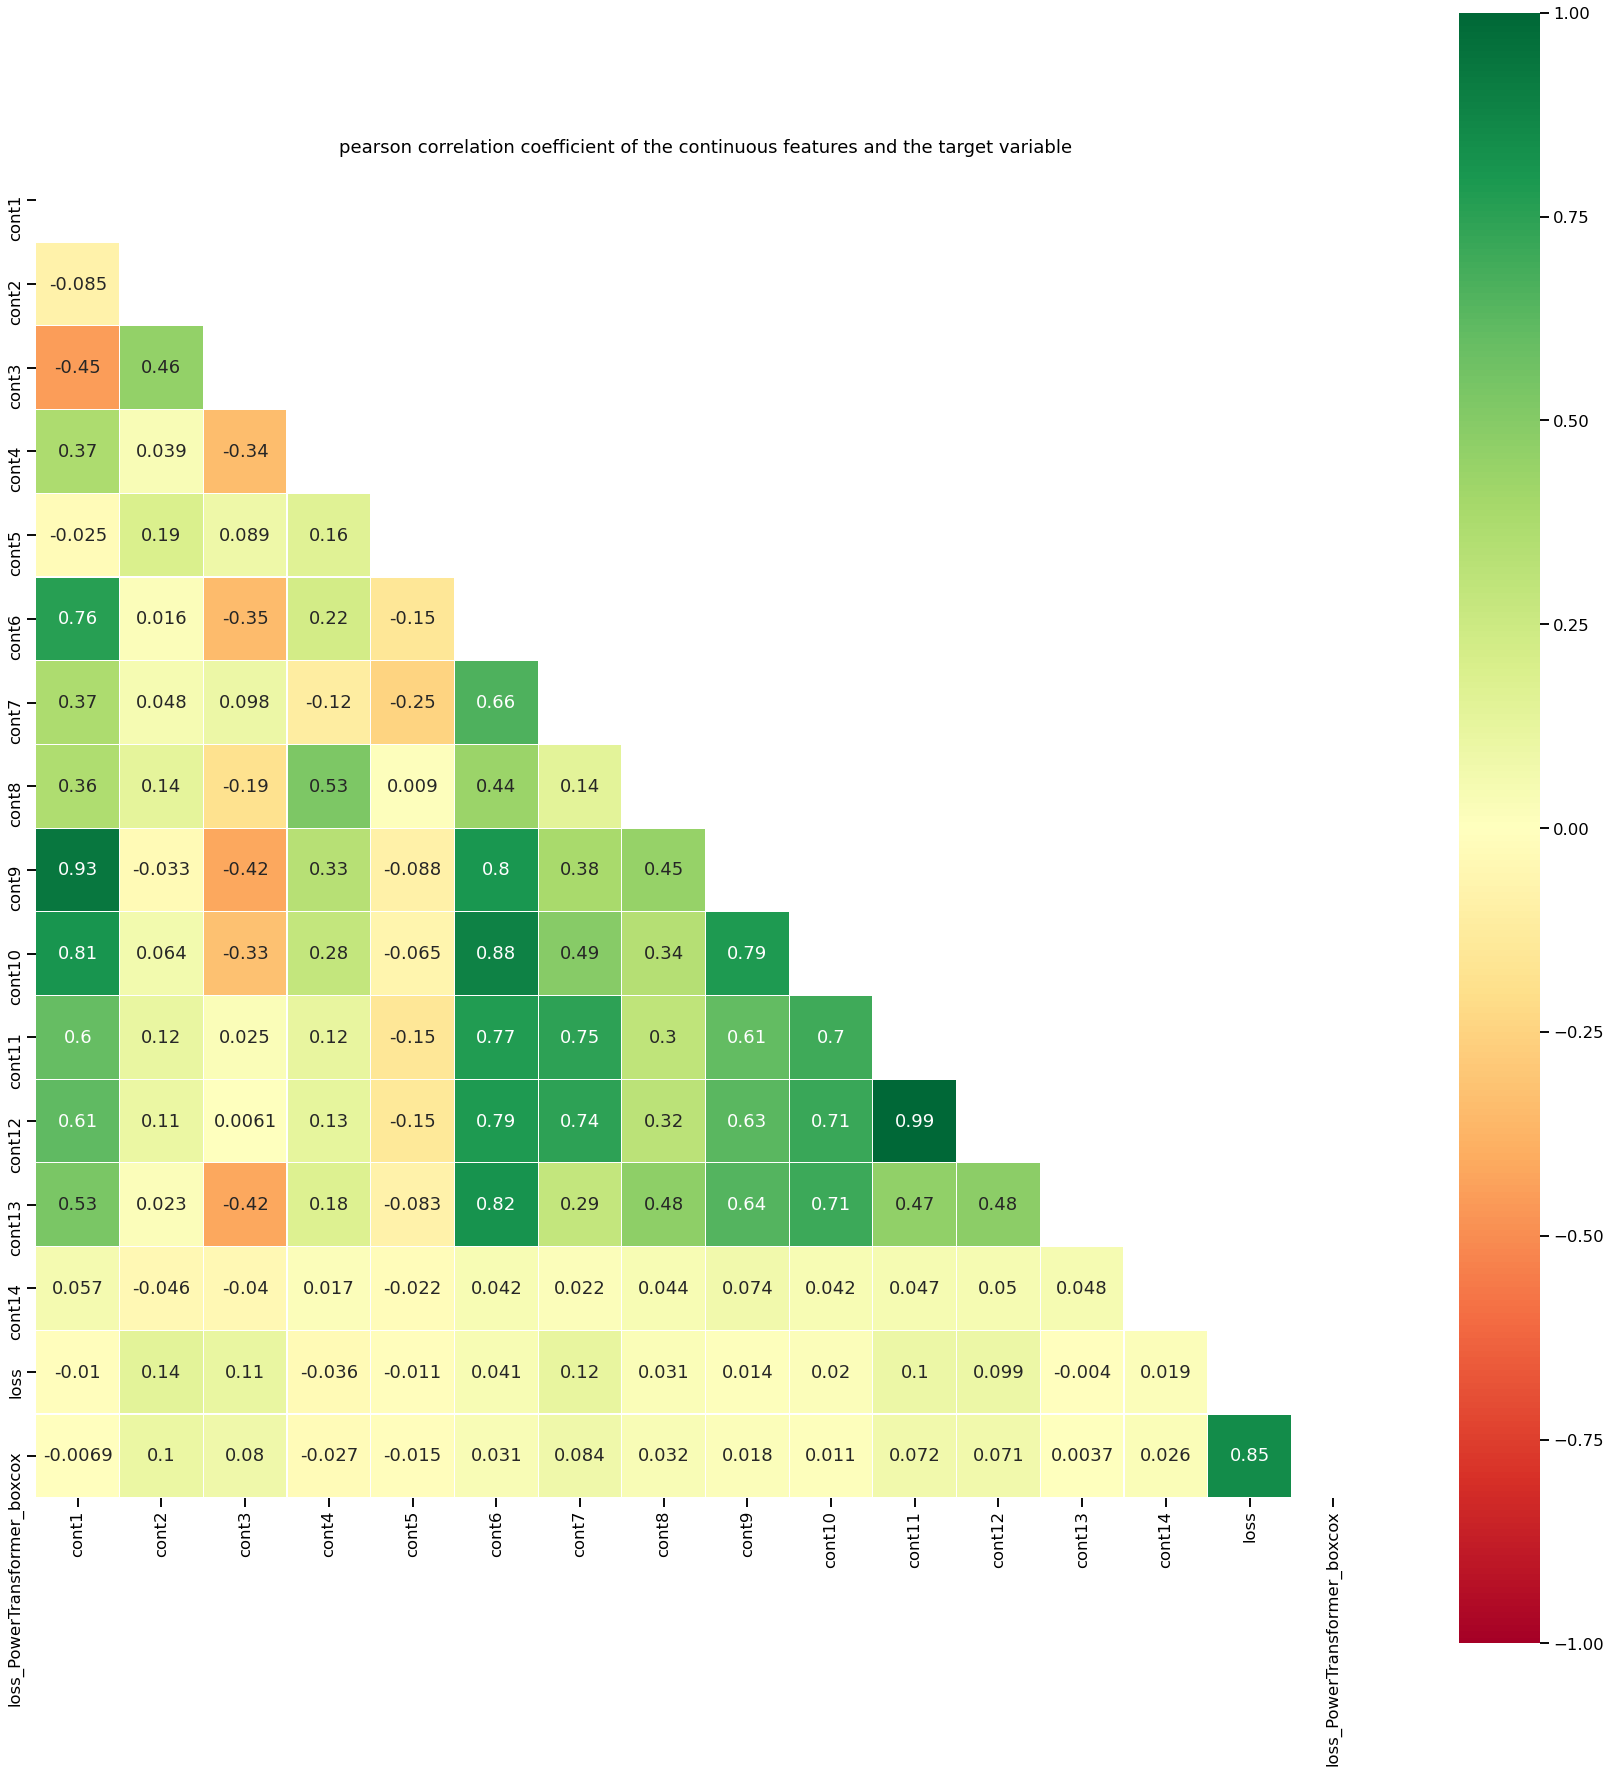

In [9]:
correlation_plot(train, 'pearson')

Correlation between the continuous features and the target variable 'loss' inlcuding the transformed target variable are very low.